In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [7]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [8]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [10]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [11]:
train_path="DATASET/TRAIN"
test_path="DATASET/TEST"

In [12]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [13]:
# visualization
x_data=[]
y_data=[]
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        img_array=cv2.resize(img_array,(224,224))
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])
data = pd.DataFrame({"image":x_data,"label":y_data})

100%|██████████| 9999/9999 [00:31<00:00, 319.86it/s]


In [14]:
data.shape

(22555, 2)

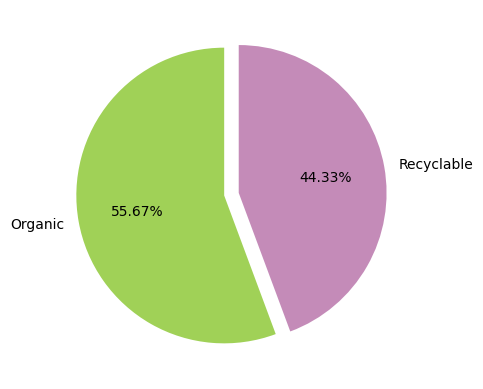

In [15]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])
plt.show()

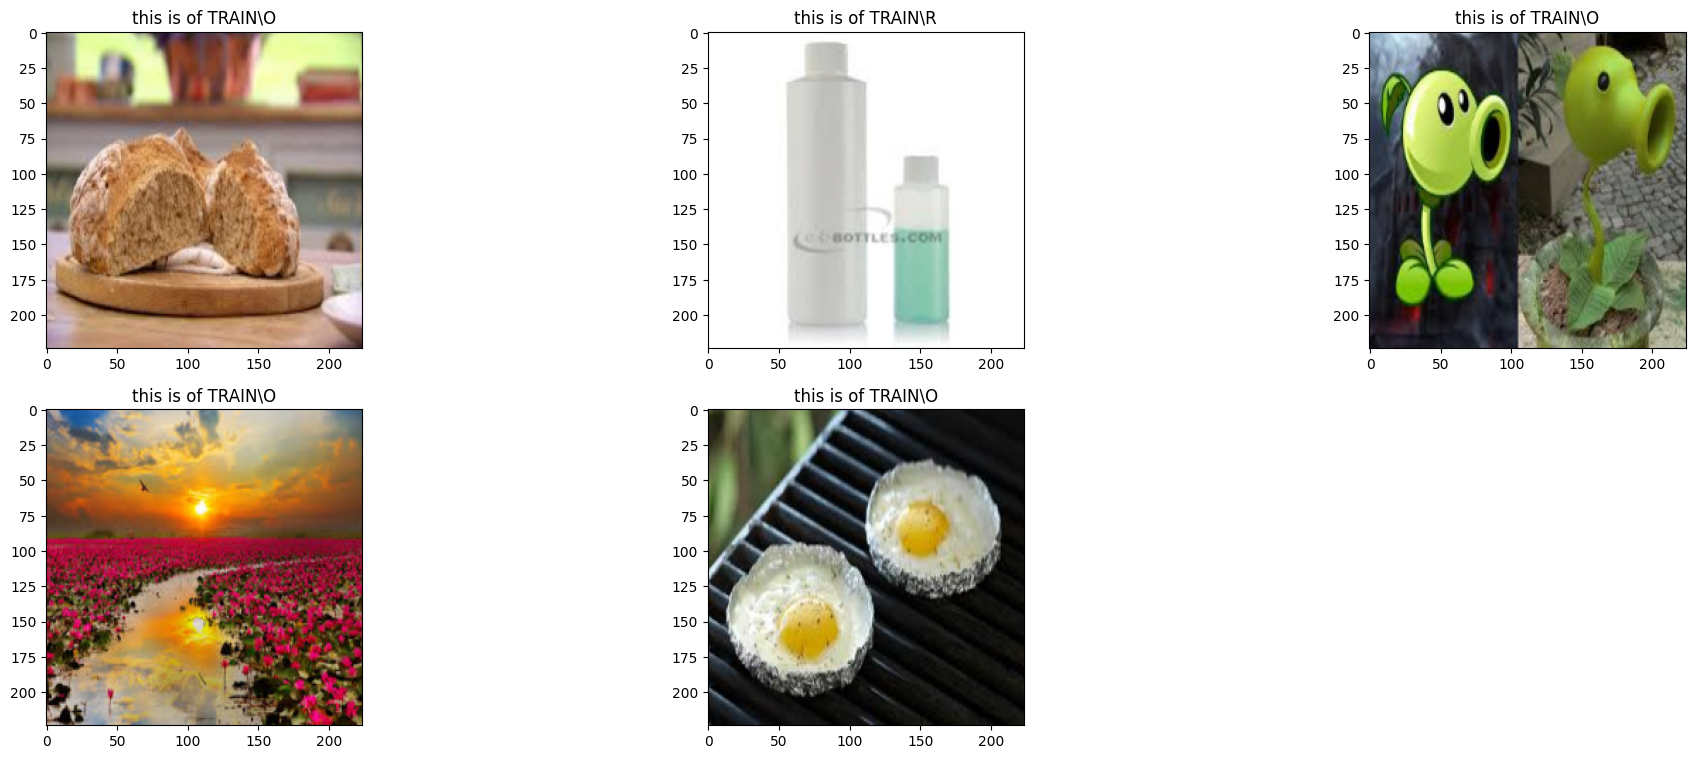

In [16]:
plt.figure(figsize=(20, 15))
for i in range(5):
    plt.subplot(4, 3, (i%12) + 1)
    index = np.random.randint(15000)
    plt.title("this is of {0}".format(data['label'][index]))
    plt.imshow(data['image'][index])
    plt.tight_layout()

## CNN - Convolutional Neural Networks

In [17]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
train_datagen =ImageDataGenerator(rescale=1./255)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator =train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=256, color_mode='rgb', class_mode='categorical')
test_generator =test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=256, color_mode='rgb', class_mode='categorical')

Found 22555 images belonging to 2 classes.
Found 2615 images belonging to 2 classes.


In [23]:
hist=model.fit(
    train_generator,epochs=2,validation_data=test_generator
)

Epoch 1/2
13/89 ━━━━━━━━━━━━━━━━━━━━ 10:31 8s/step - accuracy: 0.5687 - loss: 1.0674

KeyboardInterrupt: 

In [78]:
model.save("CNN1.h5")

In [2]:
from tensorflow.keras.models import load_model
model= load_model("CNN1.h5")

In [3]:
data_path=(r"C:\Users\sudhe\OneDrive\Desktop\o.jpg")

In [4]:
import keras
import numpy as np


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img = tf.io.read_file(data_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (224, 224))  # Resize to match model input
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Normalize the image
img = img / 255.0

# Prediction
pred = model.predict(img)

# Extract the class with the highest probability
predicted_class = np.argmax(pred, axis=1)
class_labels = ['Organic', 'Recyclable']  # Assuming two classes as per your data
result = class_labels[predicted_class[0]]

print(f"Predicted Class: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted Class: Organic


In [1]:
import cv2
import tensorflow as tf
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('CNN1.h5')

def preprocess_image(face):
    """Preprocess the detected face to match model input requirements."""
    face = cv2.resize(face, (224, 224))  # Resize to match model input size
    face = face.astype('float32') / 255.0  # Normalize
    face = np.expand_dims(face, axis=0)  # Add batch dimension
    return face

# Load face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        processed_face = preprocess_image(face)
        prediction = model.predict(processed_face)
        waste = "organic" if prediction < 0.5 else "plastic"
        
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, f"Waste: {waste}", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    cv2.imshow('Waste Classification', frame)
    
    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 86528, but received input with shape (1, 4608)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 64, 64, 3), dtype=float32)
  • training=False
  • mask=None